**We will take as a basis a network that has been trained on the VGGFace2 dataset for face classification. It contains 3.3 million images with 9000 different personas.**

*Loading a trained model https://github.com/rcmalli/keras-vggface*
- ! pip install git+https://github.com/rcmalli/keras-vggface.git

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
From (redirected): https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO&confirm=t&uuid=a1801d27-94da-4539-9c08-5097e200c8d9
To: c:\Users\Ульяна\Desktop\jupiter para git\skillbox_neuron_frameworks\resnet50face.h5
100%|███████████████████████████████████████████████████████████████████████████████| 166M/166M [00:14<00:00, 11.4MB/s]


'resnet50face.h5'

In [10]:
from tensorflow.keras.models import load_model
vggface_model = load_model("resnet50face.h5")

In [11]:
vggface_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['input_1[0][0]']             
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/

In [26]:
import requests
from io import BytesIO

img_url = "https://avatars.mds.yandex.net/get-kinopoisk-image/1777765/7d4eb861-1f80-44da-b75e-7f365d0fc3da/220x330"


Изображение успешно загружено.


1/1 [==============================] - 0s 107ms/step


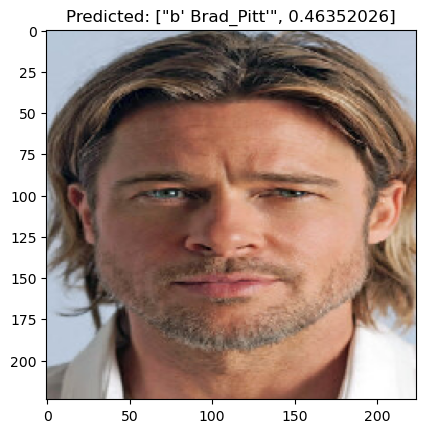

In [27]:
from keras_vggface import utils
from tensorflow.keras.preprocessing import image

response = requests.get(img_url)
img = image.load_img(BytesIO(response.content), target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) # we're using resnet50 -- so version2. We will need this function again!

preds = vggface_model.predict(x) 
plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}")
plt.imshow(img)